# 1.0 Descrevendo a base de dados

Neste notebook irão ser analisados dados referentes ao acervo e exemplares disponibilizados por todas as bibliotecas da UFRN. 

Todos os dados utilizados, foram disponibilizados atráves do **Portal de Dados Abertos da UFRN**: 

<img src="http://dados.ufrn.br/base/images/logo-dados-abertos-ufrn.png">

O Portal de Dados Abertos da Universidade Federal do Rio Grande do Norte - UFRN é uma ferramenta cujo objetivo principal é disponibilizar para toda a comunidade dados e informações públicas da Instituição, possibilitando a concretização do acesso à informação (regulamentado pela Lei de Acesso à Informação Pública - Lei nº 12.527/2011) e o acompanhamento do funcionamento da Universidade.

Os dados disponibilizados no Portal podem ser acessados por toda a população, além de utilizados para o desenvolvimento de aplicativos e ações realizadas pela própria Universidade e por outros órgãos públicos ou privados.

Para a realização dessa análise foram necessários os **datasets** de Acervo da Biblioteca, Exemplares disponíveis e os **datasets** referentes aos empréstimos entre os períodos de 2014.1 à 2017.2 (exceto 2016.1 devido à indisponibilidade do mesmo).

# 2.0 Importando os dados

Nesta seção iremos importar os dados diretamente do Portal de Dados, sem a necessidade de upload ou download por meio de uma máquina local.

## 2.1 Dados sobre o acervo

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

acervo_df = pd.read_csv( 'http://dados.ufrn.br/dataset/06641eab-7f73-46a4-85b7-181ab55dcae0/resource/db444528-9d13-470f-a14e-e495bd886993/download/exemplares-acervo.csv', sep=';' )

# Corrigindo problemas nos títulos dos livros
acervo_df['novo_titulo'] = acervo_df['titulo'].fillna('').str.replace('/','').str.lstrip().str.rstrip() + acervo_df['sub_titulo'].fillna('').str.replace('/','').str.rstrip()

# corrigindo erros nos anos do livros
acervo_df['ano'] = acervo_df['ano'].str.replace('.', '').str.replace('c','').str.replace('[','').str.replace(']', '').str.replace('?','')
acervo_df['ano'] = pd.to_numeric(acervo_df['ano'], errors='coerce', downcast='integer')
acervo_df = acervo_df.dropna(axis=0, subset=['ano'])
acervo_df['ano'] = acervo_df['ano'].astype(int)

# Cria-se uma coluna com o titulo completo e exclui as duas colunas antigas
acervo_df = acervo_df.drop(columns = ['titulo', 'sub_titulo'])
acervo_df.head()

,registro_sistema,assunto,autor,tipo_material,quantidade,ano,edicao,editora,isbn,issn,novo_titulo
0,1,Política social -#$&Região Nordeste (Br)#$&Soc...,"Ação Católica Operária, Recife.",Livro,3,1967,NaN,NaN,NaN,NaN,Nordeste: desenvolvimento sem justica
1,5,Psicologia,"Adcock, C. J.",Livro,1,1965,NaN,"Zahar,",NaN,NaN,Manual de Psicologia
2,14,Estatistica -#$&Estados Unidos.#$&Estatística.,Bureau Of Census.,Livro,1,1959,NaN,"s.n.],",NaN,NaN,Statistical Abstract Of The United States
3,15,Psicanálise (Psicologia).#$&Psicologia.,"Andrade, Almir de.",Livro,1,1933,NaN,"Schmidt,",NaN,NaN,Verdade contra Freud
4,16,Uniao Soviética -#$&História -#$&URSS.#$&1917-...,Academia de Ciências de La U.R.S.S.,Livro,1,1958,NaN,"Editorial Grijalbo,",NaN,NaN,História de La Urss :época del socialismo(1917...


## 2.2 Dados sobre Exemplares

In [147]:
# exemplares
exemplares = pd.read_csv('http://dados.ufrn.br/dataset/06641eab-7f73-46a4-85b7-181ab55dcae0/resource/e3d3e784-1349-4a8f-ad09-86e893328f9e/download/exemplares.csv', sep=';')
exemplares.head(5)

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
0,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,NÃO CIRCULA,304(812/814) A168n,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,304(812/814) A168n,1
2,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,304(812/814) A168n,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,159.9 A228m,5
4,9,L000040,Acervo de Desbaste,Biblioteca Central Zila Mamede,ESPECIAL,317.3 B79s,14


## 2.3 Dados sobre os Emprestimos

In [148]:
# emprestimos  2017.2
empres_2017_2 = pd.read_csv('http://dados.ufrn.br/dataset/1e596793-1ac3-4b59-9ae8-f053eda6b698/resource/79d668de-5d2a-4c1e-ad62-5f2933d36600/download/emprestimos-20172.csv', sep=';')
empres_2017_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110326 entries, 0 to 110325
Data columns (total 8 columns):
id_emprestimo           110326 non-null int64
codigo_barras           110326 non-null object
data_renovacao          46490 non-null object
data_emprestimo         110326 non-null object
data_devolucao          110177 non-null object
nome_usuario            110326 non-null object
id_vinculo_usuario      110326 non-null int64
tipo_vinculo_usuario    110326 non-null object
dtypes: int64(2), object(6)
memory usage: 6.7+ MB


In [149]:
# emprestimos 2017.1
empres_2017_1 = pd.read_csv('http://dados.ufrn.br/dataset/1e596793-1ac3-4b59-9ae8-f053eda6b698/resource/54f56d6f-a5cc-41d9-88d6-4f4292fe26bc/download/emprestimos-20171.csv', sep=';')
empres_2017_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118714 entries, 0 to 118713
Data columns (total 8 columns):
id_emprestimo           118714 non-null int64
codigo_barras           118714 non-null object
data_renovacao          51151 non-null object
data_emprestimo         118714 non-null object
data_devolucao          118659 non-null object
nome_usuario            118714 non-null object
id_vinculo_usuario      118714 non-null int64
tipo_vinculo_usuario    118714 non-null object
dtypes: int64(2), object(6)
memory usage: 7.2+ MB


In [150]:
# emprestimos 2016.2
empres_2016_2 = pd.read_csv('http://dados.ufrn.br/dataset/1e596793-1ac3-4b59-9ae8-f053eda6b698/resource/04ed856a-c6bd-4c67-a08b-ad7f382dcd7e/download/emprestimos-20162.csv', sep=';')
empres_2016_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107179 entries, 0 to 107178
Data columns (total 8 columns):
id_emprestimo           107179 non-null int64
codigo_barras           107179 non-null object
data_renovacao          47271 non-null object
data_emprestimo         107179 non-null object
data_devolucao          107155 non-null object
nome_usuario            107179 non-null object
id_vinculo_usuario      107179 non-null int64
tipo_vinculo_usuario    107179 non-null object
dtypes: int64(2), object(6)
memory usage: 6.5+ MB


In [0]:
# emprestimos 2016.1
 # pagina fora do ar
 # empres_2016_1 = pd.read_csv('link-dataset', sep=';')
 # empres_2016_1.info()

In [151]:
# emprestimos 2015.2
empres_2015_2 = pd.read_csv('http://dados.ufrn.br/dataset/1e596793-1ac3-4b59-9ae8-f053eda6b698/resource/f07e4501-8632-487f-adf0-116d5b6fb4fe/download/emprestimos-20152.csv', sep=';')
empres_2015_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98115 entries, 0 to 98114
Data columns (total 8 columns):
id_emprestimo           98115 non-null int64
codigo_barras           98115 non-null object
data_renovacao          35803 non-null object
data_emprestimo         98115 non-null object
data_devolucao          98092 non-null object
nome_usuario            98115 non-null object
id_vinculo_usuario      98115 non-null int64
tipo_vinculo_usuario    98115 non-null object
dtypes: int64(2), object(6)
memory usage: 6.0+ MB


In [152]:
# emprestimos 2015.1
empres_2015_1 = pd.read_csv('http://dados.ufrn.br/dataset/1e596793-1ac3-4b59-9ae8-f053eda6b698/resource/2d18b7a9-b458-4668-8858-037c55049d40/download/emprestimos-20151.csv', sep=';')
empres_2015_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126738 entries, 0 to 126737
Data columns (total 8 columns):
id_emprestimo           126738 non-null int64
codigo_barras           126738 non-null object
data_renovacao          53597 non-null object
data_emprestimo         126738 non-null object
data_devolucao          126709 non-null object
nome_usuario            126738 non-null object
id_vinculo_usuario      126738 non-null int64
tipo_vinculo_usuario    126738 non-null object
dtypes: int64(2), object(6)
memory usage: 7.7+ MB


In [153]:
# emprestimos 2014.2
empres_2014_2 = pd.read_csv('http://dados.ufrn.br/dataset/1e596793-1ac3-4b59-9ae8-f053eda6b698/resource/832df6b3-ccb0-4370-832b-193a2fe90085/download/emprestimos-20142.csv', sep=';')
empres_2014_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122129 entries, 0 to 122128
Data columns (total 8 columns):
id_emprestimo           122129 non-null int64
codigo_barras           122129 non-null object
data_renovacao          51795 non-null object
data_emprestimo         122129 non-null object
data_devolucao          122107 non-null object
nome_usuario            122129 non-null object
id_vinculo_usuario      122129 non-null int64
tipo_vinculo_usuario    122129 non-null object
dtypes: int64(2), object(6)
memory usage: 7.5+ MB


In [154]:
# emprestimos 2014.1
empres_2014_1 = pd.read_csv( 'http://dados.ufrn.br/dataset/1e596793-1ac3-4b59-9ae8-f053eda6b698/resource/8e97f632-a6fe-4349-b06b-f650e804a7b9/download/emprestimos-20141.csv', sep=';' )
empres_2014_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113181 entries, 0 to 113180
Data columns (total 8 columns):
id_emprestimo           113181 non-null int64
codigo_barras           113181 non-null object
data_renovacao          47815 non-null object
data_emprestimo         113181 non-null object
data_devolucao          113152 non-null object
nome_usuario            113181 non-null object
id_vinculo_usuario      113181 non-null int64
tipo_vinculo_usuario    113181 non-null object
dtypes: int64(2), object(6)
memory usage: 6.9+ MB


# 3.0  Explorando os dados

## 3.1 Concatenando todos os empréstimos em um único DataFrame

In [155]:
# concatenando os DataFrames
empres_dfs = [empres_2014_1, empres_2015_1, empres_2015_1, empres_2015_2, empres_2016_2, empres_2017_1, empres_2017_2]

empres_total = pd.concat( empres_dfs,  ignore_index=True )
empres_total.info()
empres_total.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800991 entries, 0 to 800990
Data columns (total 8 columns):
id_emprestimo           800991 non-null int64
codigo_barras           800991 non-null object
data_renovacao          335724 non-null object
data_emprestimo         800991 non-null object
data_devolucao          800653 non-null object
nome_usuario            800991 non-null object
id_vinculo_usuario      800991 non-null int64
tipo_vinculo_usuario    800991 non-null object
dtypes: int64(2), object(6)
memory usage: 48.9+ MB


(800991, 8)

In [156]:
tipo_vinculos = empres_total['tipo_vinculo_usuario'].value_counts().to_dict()
tipo_vinculos

{'ALUNO DE GRADUAÇÃO': 618269,
 'ALUNO DE PÓS-GRADUAÇÃO': 118852,
 'ALUNO MÉDIO/TÉCNICO': 13256,
 'DOCENTE': 27049,
 'DOCENTE EXTERNO': 10807,
 'SERVIDOR TÉCNICO-ADMINISTRATIVO': 11597,
 'USUÁRIO EXTERNO': 1161}

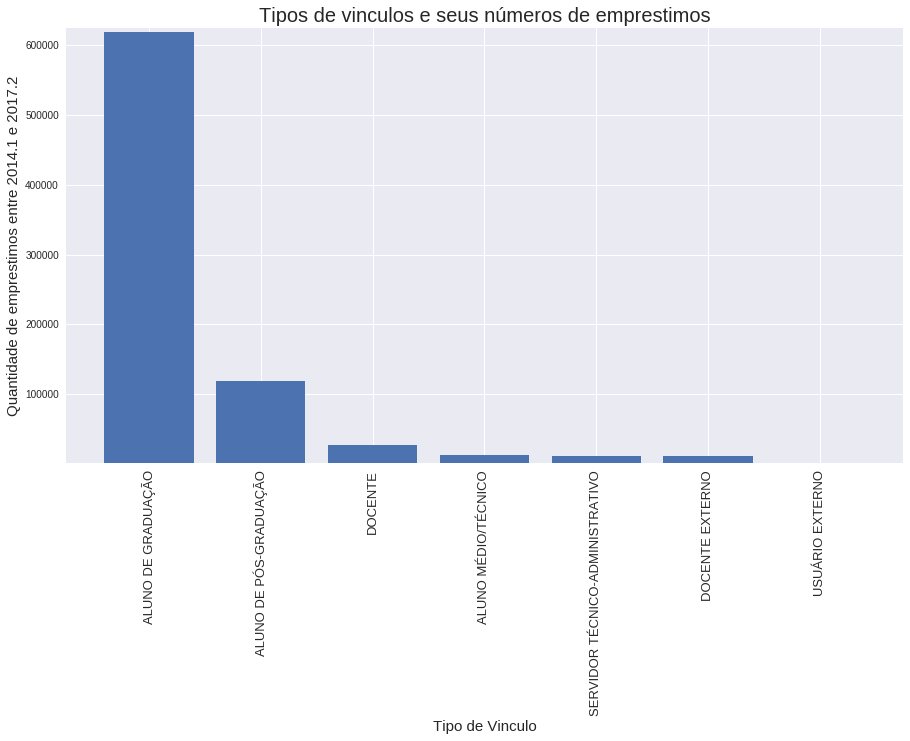

In [157]:
plt.rcParams['figure.figsize'] = (15,8)
plt.bar(range(len(tipo_vinculos)), list(tipo_vinculos.values()), align='center')
plt.xticks(range(len(tipo_vinculos)), list(tipo_vinculos.keys()))


# putting name
plt.title('Tipos de vinculos e seus números de emprestimos', fontsize=20)
# customizing x ticks
plt.xticks( fontsize=13,rotation=90)
# name of the x 
plt.xlabel("Tipo de Vinculo", fontsize=15)
# name of the y
plt.ylabel("Quantidade de emprestimos entre 2014.1 e 2017.2", fontsize=15)
plt.ylim( min(tipo_vinculos.values()), max(tipo_vinculos.values())+max(tipo_vinculos.values())//100 )

plt.show()

## 3.2 Explorando números sobre os Exemplares e Acervo

### 3.2.1 Anos com mais livros no acervo

### 3.2.2 Maior numero de exemplares por livros

In [184]:
# criando dicionario que relaciona registro de sistema e codigo de barras
dicionario_reg_cod = exemplares.groupby('registro_sistema')['codigo_barras'].apply(list).to_dict()
qtd_de_exemplares_por_reg = exemplares.groupby('registro_sistema')['codigo_barras'].value_counts()

dicionario_reg_cod_total = {}
for chave in dicionario_reg_cod.keys():
  dicionario_reg_cod_total[chave] = qtd_de_exemplares_por_reg[chave].sum()

dicionario_reg_cod_total

{1: 3,
 5: 1,
 14: 1,
 15: 1,
 16: 1,
 18: 2,
 24: 1,
 27: 1,
 28: 1,
 31: 1,
 32: 1,
 33: 1,
 35: 1,
 37: 6,
 38: 1,
 39: 1,
 44: 1,
 47: 1,
 50: 1,
 51: 1,
 52: 1,
 53: 1,
 55: 2,
 56: 1,
 57: 1,
 59: 1,
 61: 2,
 64: 1,
 65: 1,
 66: 1,
 69: 1,
 71: 1,
 72: 1,
 75: 1,
 79: 1,
 80: 1,
 81: 2,
 85: 1,
 89: 1,
 90: 4,
 91: 9,
 96: 1,
 99: 1,
 102: 1,
 103: 1,
 104: 1,
 107: 1,
 108: 1,
 111: 1,
 113: 1,
 114: 1,
 118: 1,
 119: 1,
 122: 1,
 123: 1,
 131: 1,
 135: 1,
 137: 1,
 144: 1,
 153: 2,
 154: 3,
 156: 1,
 157: 1,
 158: 1,
 159: 1,
 164: 1,
 166: 3,
 174: 14,
 175: 1,
 183: 1,
 184: 3,
 185: 1,
 189: 1,
 191: 2,
 196: 1,
 198: 1,
 208: 1,
 209: 7,
 211: 1,
 213: 1,
 214: 1,
 217: 2,
 219: 1,
 220: 1,
 224: 1,
 225: 1,
 226: 1,
 227: 1,
 233: 1,
 237: 1,
 238: 3,
 241: 5,
 245: 1,
 247: 1,
 248: 2,
 252: 1,
 255: 1,
 258: 6,
 259: 1,
 261: 1,
 262: 1,
 268: 1,
 269: 1,
 271: 1,
 272: 1,
 273: 6,
 275: 1,
 276: 1,
 280: 1,
 281: 3,
 283: 7,
 290: 1,
 292: 1,
 293: 1,
 294: 1,
 296: 1,


In [0]:
# verificando livros com mais exemplares
dicionario_reg_total_sums = OrderedDict( sorted( dicionario_reg_cod_total.items(), reverse=True, key=lambda x: x[1] ) )

In [170]:
nomes_livros_mais_exemplares = []
qtd_livros_mais_exemplares = []
for registro in dicionario_reg_total_sums.keys():
  nome = acervo_df.loc[acervo_df['registro_sistema'] == registro]['novo_titulo'].tolist()
  if len(nome) > 0:
    nomes_livros_mais_exemplares.append( nome[0] )
    qtd_livros_mais_exemplares.append(dicionario_reg_total_sums[registro])

print( "Top 10 de livros com mais exemplares na biblioteca" )
for index in range( 10 ):
  print( nomes_livros_mais_exemplares[index], qtd_livros_mais_exemplares[index], sep='=' )
  

Top 10 de livros com mais exemplares na biblioteca
Física para cientistas e engenheiros=848
Fundamentos de física=395
Fundamentos de física=329
Obras psicológicas completas de Sigmund Freud=239
Cálculo=236
Um curso de cálculo=235
Fundamentos da programação de computadores :algoritmos, Pascal, CC++ e Java=217
Cálculo=202
Introdução à engenharia ambiental :[o desafio do desenvolvimento sustentável]=200
Álgebra linear com aplicações=181


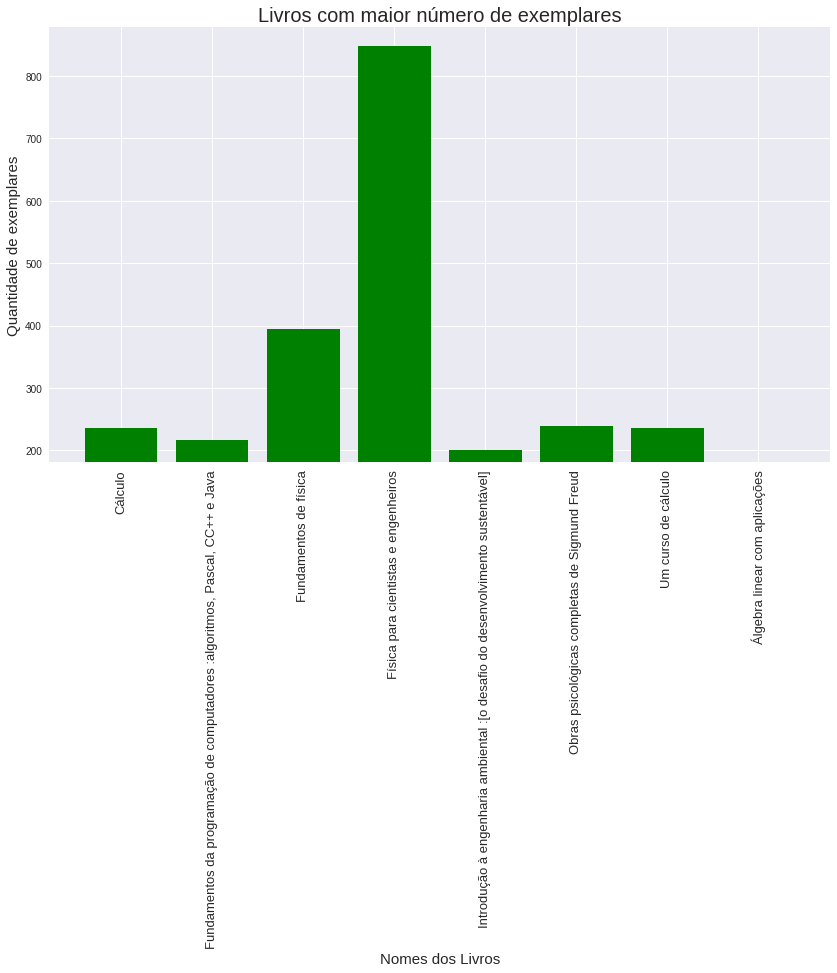

In [171]:
nomes_livros = pd.Series( nomes_livros_mais_exemplares[:10] )
qtd_livros = pd.Series( qtd_livros_mais_exemplares[:10] )

# Plotando um gráfico para melhor vizualização
fig, axis = plt.subplots(figsize=(14,8))

barlist = plt.bar(nomes_livros, qtd_livros, color='g')

# putting name
plt.title('Livros com maior número de exemplares', fontsize=20)
# customizing x ticks
plt.xticks( fontsize=13,rotation=90)
# name of the x 
plt.xlabel("Nomes dos Livros", fontsize=15)
# name of the y
plt.ylabel("Quantidade de exemplares", fontsize=15)
plt.ylim( qtd_livros.min() , qtd_livros.max()+30 )

# saving the graph on a picture
plt.savefig("numeroExemplares.png")
plt.show()


## 3.3 Explorando os dados sobre Empréstimos entre 2014.1 e 2017.2 (exceto 2016.2)

In [172]:
#verificando usuario que mais pediram emprestimos
usuario_mais_emprestimos = empres_total['nome_usuario'].value_counts()
# top 10 mais emprestimos
usuario_mais_emprestimos[:10]

FRANCISCO RICARDO DE SOUZA JUNIOR      428
IKARO CAVALCANTE LIRA DE ARAUJO        379
NATHALIA LINDSAY PEREIRA DE QUEIROZ    341
ARTUR JEFFERSON FARIAS DA SILVA        329
LARA VALESKA DE MEDEIROS ROCHA         327
AGAMENON CLEMENTE DE MORAIS JUNIOR     295
JOSIMARA TATIANE DA SILVA              276
JEAN MARCEL BEZERRA FRANÇA             273
WYSTERLÂNYO KAYO PEREIRA BARROS        271
JAÍSIA LIMA DE MEDEIROS                260
Name: nome_usuario, dtype: int64

## 3.4 Verificando quais livros foram mais emprestados

### 3.4.1 Mais emprestados, por exemplar

In [0]:
mais_emprestados = empres_total['codigo_barras'].value_counts().to_dict()

# verificando exemplares mais emprestados
dicionario_cod_mais_emprestados = OrderedDict( sorted( mais_emprestados.items(), reverse=True, key=lambda x: x[1] ) )

lista_cod_mais_emprestados = list( dicionario_cod_mais_emprestados.keys() )[:1000]
# dicionario com os numeros de registros do exemplares mais emprestados
reg_mais_emprestados = OrderedDict()
for chave in lista_cod_mais_emprestados:
  lista_registro = exemplares.loc[ exemplares['codigo_barras'] == chave ]['registro_sistema'].values
  if len(lista_registro) > 0:
    reg_mais_emprestados[chave] = lista_registro[0]

In [179]:
mais_emprestados

{'2015009066': 126,
 '2010091988': 116,
 '2009055616': 114,
 '2013087915': 92,
 '2013091436': 82,
 '2014086298': 76,
 '2014083405': 66,
 '2013088582': 64,
 '2013088640': 63,
 '2013091426': 58,
 '2012008108': 56,
 '2014046005': 55,
 '2013085153': 54,
 '2011075249': 54,
 '2010091990': 52,
 '2013091505': 52,
 '2014053900': 52,
 '2014053897': 50,
 '2013076375': 50,
 '2011077403': 48,
 '2009036153': 48,
 '2013033641': 48,
 '2014086216': 47,
 '2012042661': 47,
 'L202843': 47,
 '2009040653': 47,
 '2010091989': 47,
 '2014086220': 47,
 '2012042664': 46,
 '2014086219': 46,
 'UP02291': 46,
 '2006004043': 45,
 '2011053778': 45,
 'L202920': 45,
 'L202960': 45,
 '2013085580': 45,
 '2013006439': 45,
 '2014075230': 45,
 '2014061927': 45,
 '2011033189': 45,
 '2013006507': 45,
 '2011083856': 45,
 '2013011034': 44,
 '2014075243': 44,
 '2013087962': 44,
 '2013006432': 44,
 '2011078343': 44,
 '2013085194': 44,
 '2010091965': 44,
 '2015013838': 43,
 '2013006498': 43,
 '2011012945': 43,
 '2011033142': 43,
 '

In [0]:
# pesquisa no dataset de acervo e captura o nome dos exemplares
nome_mais_emprestados_por_codigo = OrderedDict()
for chave in reg_mais_emprestados.keys():
  nome = acervo_df.loc[ acervo_df['registro_sistema'] == reg_mais_emprestados[chave] ]['novo_titulo'].values
  if len(nome) > 0:
    nome_mais_emprestados_por_codigo[chave] = nome[0]

In [177]:
nome_mais_emprestados_por_codigo

OrderedDict([('2015009066', 'Atlas de anatomia humana'),
             ('2010091988', 'Histologia básica'),
             ('2009055616', 'Farmacologia integrada'),
             ('2013087915', 'Histologia básica'),
             ('2013091436', 'Atlas de anatomia humana'),
             ('2014086298',
              'Histologia :texto e atlas, em correlação com a biologia celular e molecular'),
             ('2014083405', 'Tratado de fisiologia médica'),
             ('2013088582', 'Exame clínico'),
             ('2013088640', 'Anatomia orientada para a clínica'),
             ('2013091426', 'Tratado de fisiologia médica'),
             ('2012008108', 'Tratado de fisiologia médica'),
             ('2014046005', 'Prometheus :atlas de anatomia'),
             ('2013085153', 'Química orgânica'),
             ('2011075249', 'Krause alimentos, nutrição e dietoterapia'),
             ('2010091990', 'Histologia básica'),
             ('2013091505',
              'Histologia e biologia celular :uma i

### 3.4.2 Mais emprestados, por titulo

In [225]:
mais_empres_titulo = OrderedDict()

for chave in dicionario_reg_cod.keys():
  mais_empres_titulo[chave] = 0
  for codigo in dicionario_reg_cod[chave]:
    if codigo in mais_emprestados:
      mais_empres_titulo[chave] += mais_emprestados[codigo]

sorted_mais_empres_titulo = OrderedDict( sorted( mais_empres_titulo.items(), reverse=True, key=lambda x: x[1] ) )
lista_reg_mais_emprestados = list( sorted_mais_empres_titulo.keys() )[:11]
lista_reg_mais_emprestados_qtd = list( sorted_mais_empres_titulo.values() )[:11]

nome_mais_emprestados = OrderedDict()
for chave in lista_reg_mais_emprestados:
  nome = acervo_df.loc[ acervo_df['registro_sistema'] == chave ]['novo_titulo'].values
  if len(nome) > 0:
    nome_mais_emprestados[ chave ] = nome[0]

sorted_mais_empres_titulo

OrderedDict([(162354, 9143),
             (190272, 8552),
             (167086, 6718),
             (200280, 5827),
             (165526, 5644),
             (169092, 4867),
             (45093, 3850),
             (101841, 3695),
             (112811, 3136),
             (52119, 3110),
             (174249, 3032),
             (89936, 2489),
             (174137, 2483),
             (161722, 2480),
             (161715, 2420),
             (189867, 2351),
             (204892, 2311),
             (179627, 2282),
             (167448, 2056),
             (205952, 2021),
             (123825, 1836),
             (160340, 1798),
             (170629, 1762),
             (108684, 1612),
             (110007, 1496),
             (183270, 1462),
             (122188, 1459),
             (37726, 1411),
             (124726, 1353),
             (180725, 1352),
             (178604, 1302),
             (191624, 1266),
             (189964, 1246),
             (165575, 1239),
             (2053

In [226]:
lista_nomes = []
for chave in nome_mais_emprestados.keys():
  lista_nomes.append( nome_mais_emprestados[chave] )
lista_nomes

['Fundamentos de física',
 'Fundamentos de física',
 'Cálculo',
 'Cálculo',
 'Física para cientistas e engenheiros',
 'Um curso de cálculo',
 'Histologia básica',
 'Química :a ciência central',
 'Álgebra linear com aplicações',
 'Fundamentos da biologia celular']

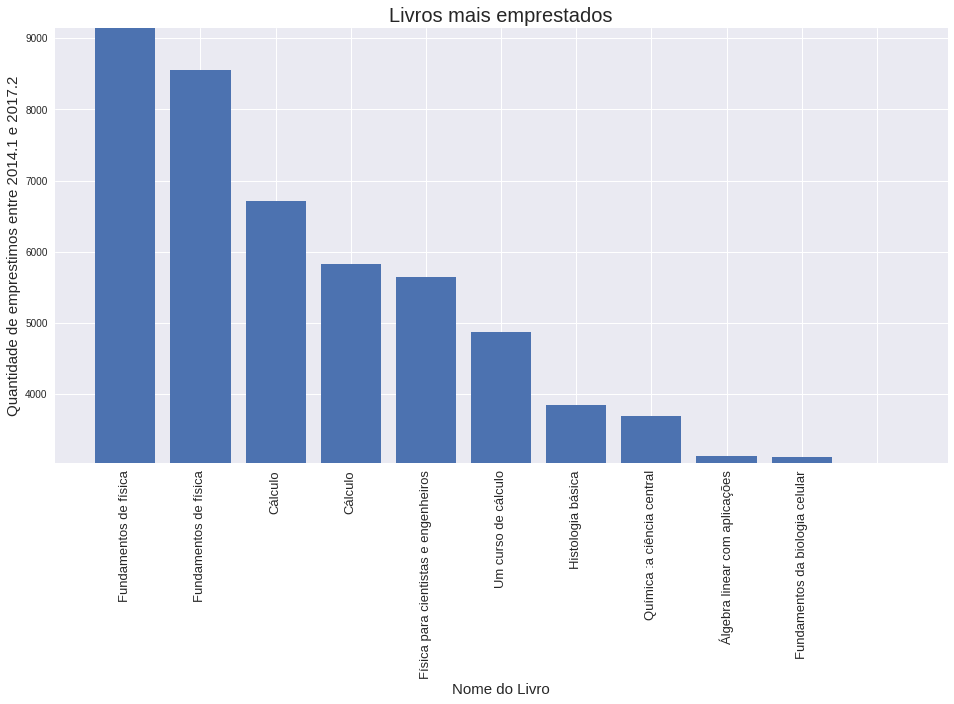

In [232]:
plt.rcParams['figure.figsize'] = (16,8)
plt.bar(range(11), lista_reg_mais_emprestados_qtd, align='center')
plt.xticks(range(11), lista_nomes)


# putting name
plt.title('Livros mais emprestados', fontsize=20)
# customizing x ticks
plt.xticks( fontsize=13,rotation=90)
# name of the x 
plt.xlabel("Nome do Livro", fontsize=15)
# name of the y
plt.ylabel("Quantidade de emprestimos entre 2014.1 e 2017.2", fontsize=15)
plt.ylim( min(lista_reg_mais_emprestados_qtd), max(lista_reg_mais_emprestados_qtd))

plt.show()